### **HOW ARE COEFFICIENTS AFFECTED?**

In [1]:
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [5]:
data=load_diabetes()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['Target']=data.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [7]:
X_train,X_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.3,random_state=30)

In [8]:
coefs=[]
r2_scores=[]
for i in [0,0.1,1,10]:
    reg=Lasso(alpha=i)
    reg.fit(X_train,y_train)
    coefs.append(reg.coef_.tolist())
    y_pred=reg.predict(X_test)
    r2_scores.append(r2_score(y_test,y_pred))
    

C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.144e+05, tolerance: 1.755e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.R

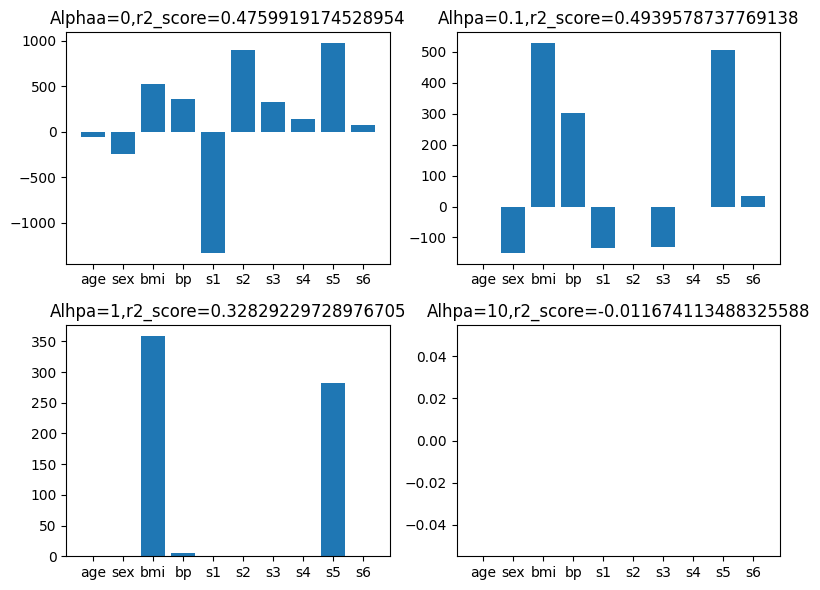

In [15]:
plt.figure(figsize=(8,6))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title(f'Alphaa=0,r2_score={r2_scores[0]}')
plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title(f'Alhpa=0.1,r2_score={r2_scores[1]}')
plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title(f'Alhpa=1,r2_score={r2_scores[2]}')
plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title(f'Alhpa=10,r2_score={r2_scores[3]}')
plt.tight_layout()
plt.show()

We see that the feature selection is happening as the coeffieceints with less importance are reaching to zero.

### **HIGHER COEFFICIENTS ARE AFFECTED MORE**


In [17]:
alphas=[0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
coefs=[]
for i in alphas:
    reg=Lasso(alpha=i)
    reg.fit(X_train,y_train)
    coefs.append(reg.coef_)
    

C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.144e+05, tolerance: 1.755e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.R

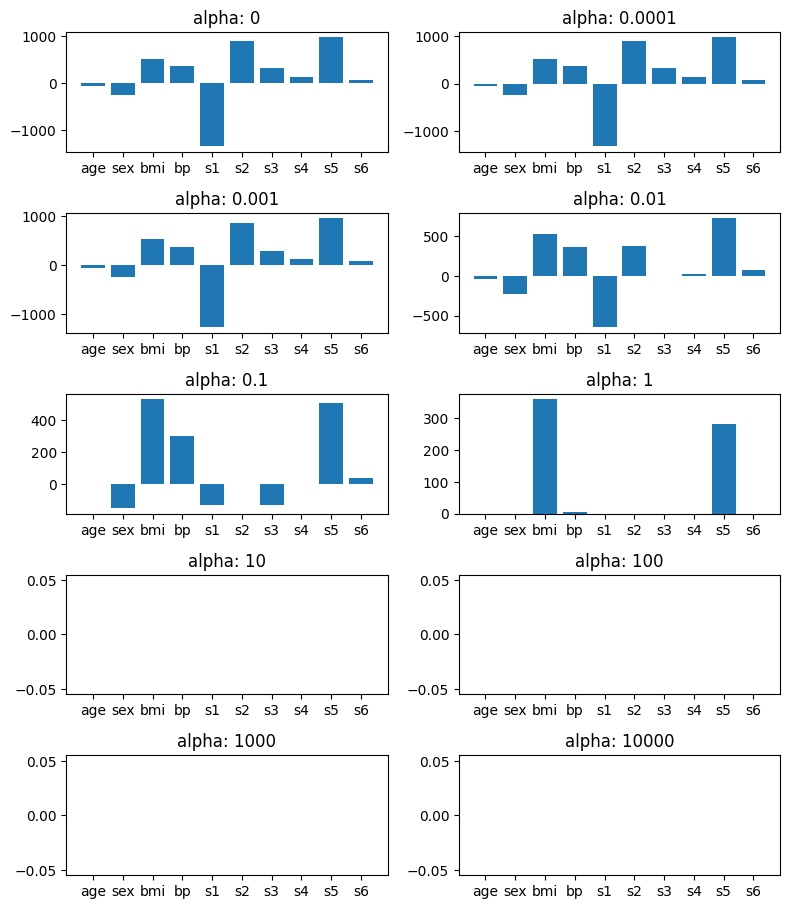

In [25]:
plt.figure(figsize=(8, 18))
for k, j in enumerate(alphas):
    plt.subplot(len(alphas), 2, k + 1)  # nrows, ncols, index
    plt.bar(data.feature_names, coefs[k])
    plt.title(f"alpha: {j}")
plt.tight_layout()
plt.show()

In [27]:
input_array=np.array(coefs)
coef_df=pd.DataFrame(input_array,columns=data.feature_names)
coef_df['alpha']=alphas
coef_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,-55.911010,-244.978291,520.387773,359.950996,-1337.239395,901.976668,324.401637,135.114823,978.075971,76.400053
0.0001,-55.792807,-244.834832,520.427789,359.886696,-1330.200238,896.581285,321.084999,133.908328,975.435044,76.385720
0.0010,-54.729214,-243.544101,520.787616,359.308051,-1266.883750,848.050906,291.251165,123.054384,951.680483,76.256609
0.0100,-44.173102,-230.636455,524.492496,353.482395,-646.065944,371.461691,0.000000,17.996595,718.550861,74.910959
0.1000,-0.000000,-151.085854,528.937069,301.456783,-134.589139,-0.000000,-129.818178,0.000000,506.270344,34.212074
1.0000,0.000000,-0.000000,359.033224,5.511119,0.000000,0.000000,-0.000000,0.000000,282.849791,0.000000
10.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
100.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
1000.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


### **IMPACT ON BIAS AND VARIENCE**

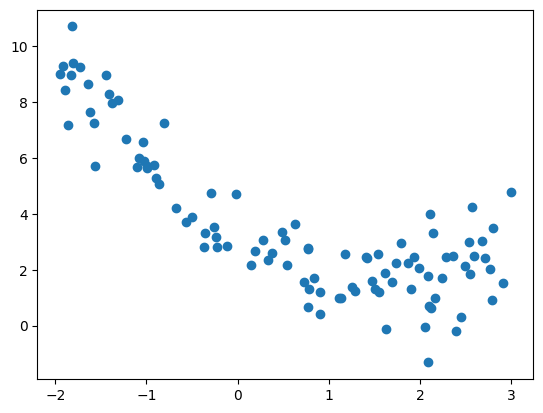

In [29]:
m=100
x=5*np.random.rand(m,1)-2
y=0.7*x**2-2*x+3+np.random.randn(m,1)
plt.scatter(x,y)
plt.show()

The bias is increased by the use of lasso regression thus reducing the overfitting.

In [36]:
from mlxtend.evaluate import bias_variance_decomp

alphas = np.linspace(0,30,100)

loss = []
bias = []
variance = []

for i in alphas:
    reg = Lasso(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=12)
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.033e+05, tolerance: 1.830e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.R

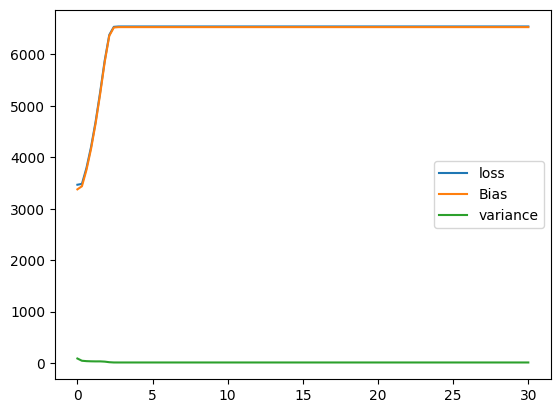

In [37]:
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='Bias')
plt.plot(alphas,variance,label='variance')
plt.legend()

### **EFFECT OF REGULARIZATION ON LOSS FUNCTION**


[27.82809103]
-2.29474455867698


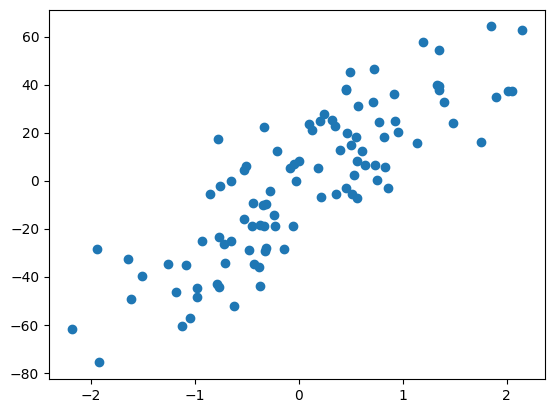

In [46]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

In [50]:
def cal_loss(m,alpha):
    return np.sum((y - m*X.ravel() + 2.29)**2) + alpha*abs(m)

In [51]:
def predict(m):
    return m*X - 2.29

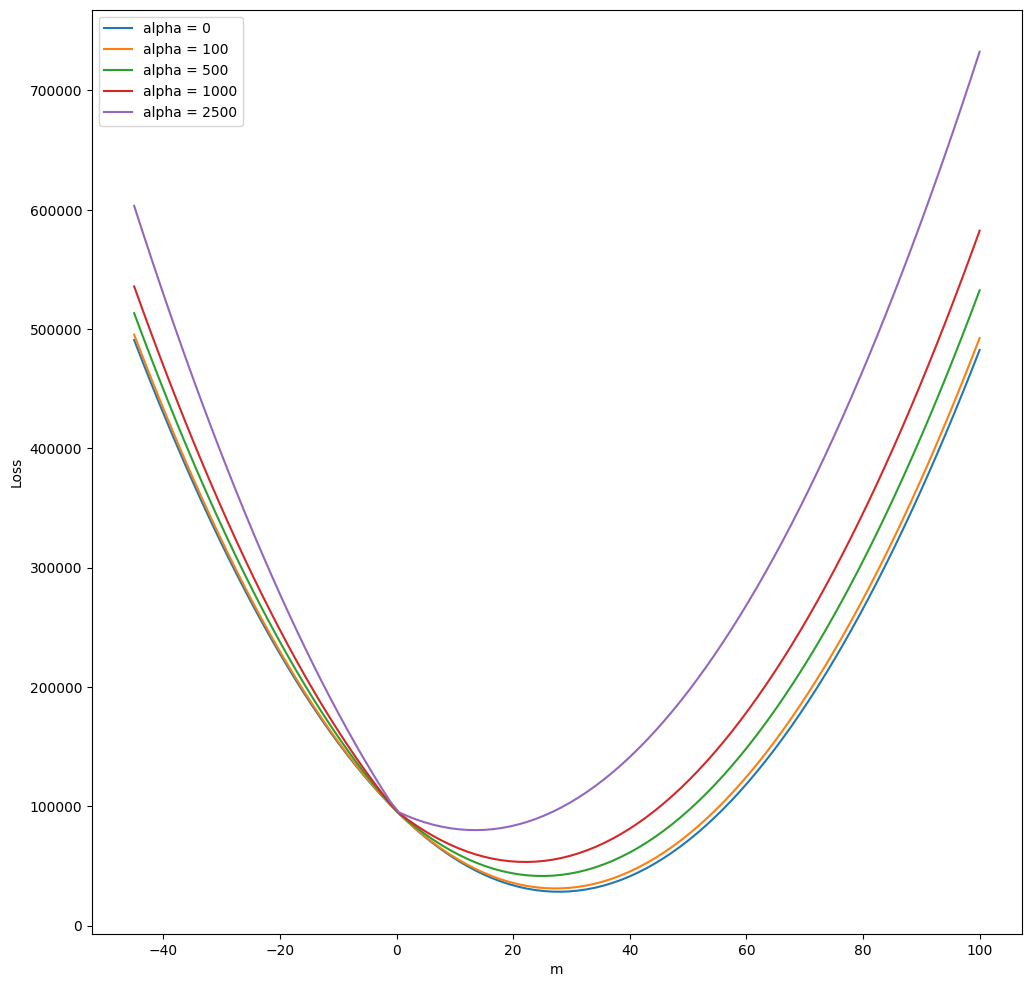

In [53]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(12,12))
for j in [0,100,500,1000,2500]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m,loss,label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('m')
plt.ylabel('Loss')
plt.show()

Here it is seen that the loss increases with the increase in the alpha. While the values of the m are decresing with the increasing. Here we see the angleing of the value of the loss at the alpgha so high, which means that after the certain value of alpha the value of m becomes zero and remains zero even after that value of alpha. 